<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [6]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [8]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [9]:
boston_df = pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


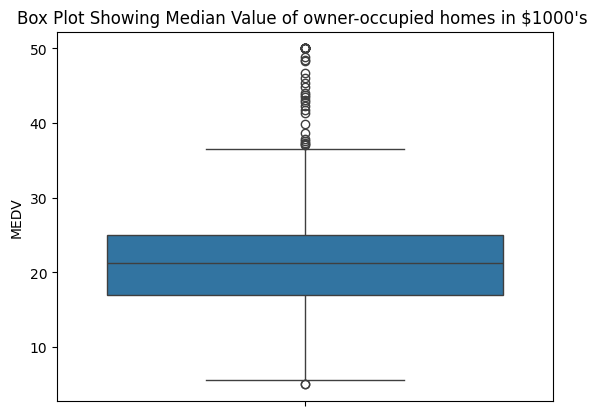

In [10]:
ax = sns.boxplot(y='MEDV', data=boston_df)
pyplot.title("Box Plot Showing Median Value of owner-occupied homes in $1000's ")
pyplot.show()

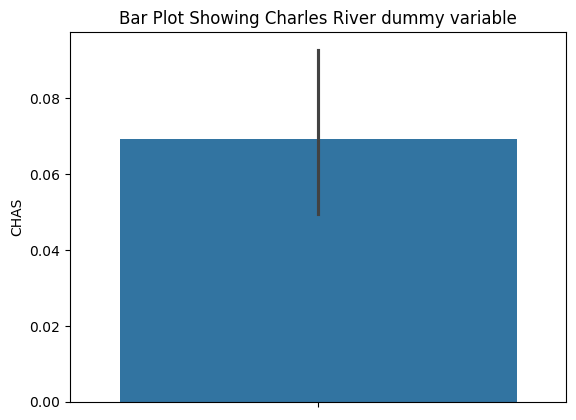

In [11]:
ax = sns.barplot(y="CHAS", data=boston_df)
pyplot.title("Bar Plot Showing Charles River dummy variable")
pyplot.show()

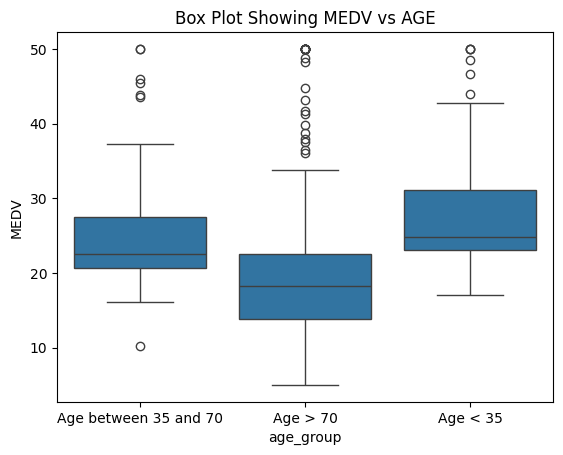

In [13]:
boston_df.loc[(boston_df['AGE']<=35), 'age_group'] = 'Age < 35'
boston_df.loc[(boston_df['AGE']>=35) & (boston_df['AGE']<=70),  'age_group'] = 'Age between 35 and 70'
boston_df.loc[(boston_df['AGE']>70), 'age_group'] = 'Age > 70'
order = ['Age < 35', 'Age between 35 and 70', 'Age > 70']
L35 = boston_df[boston_df['age_group'] == 'Age < 35']['MEDV']
B35A70 = boston_df[boston_df['age_group'] == 'Age between 35 and 70']['MEDV']
M70 = boston_df[boston_df['age_group'] == 'Age > 70']['MEDV']
ax = sns.boxplot(y='MEDV', x='age_group', data=boston_df)
pyplot.title("Box Plot Showing MEDV vs AGE")
pyplot.show()

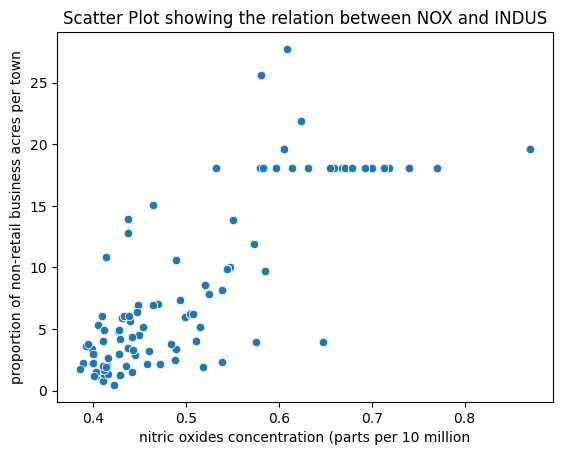

In [15]:
ax = sns.scatterplot(x='NOX', y='INDUS',data=boston_df)
pyplot.title("Scatter Plot showing the relation between NOX and INDUS")
pyplot.xlabel("nitric oxides concentration (parts per 10 million")
pyplot.ylabel("proportion of non-retail business acres per town")
pyplot.show()

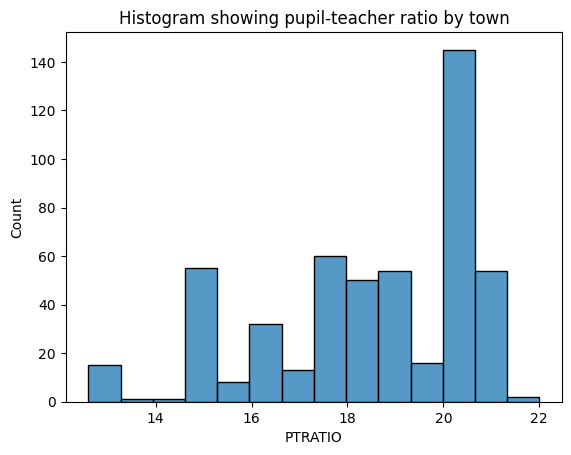

In [17]:
ax = sns.histplot(boston_df['PTRATIO'])
pyplot.title("Histogram showing pupil-teacher ratio by town")
pyplot.show()

Null hypothesis: There is no significant difference in median value of houses bounded by the Charles river; 
Alternate hypothesis: There is significant difference in median value of houses bounded by the Charles river; 
alpha = 0.05

In [18]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'], boston_df[boston_df['CHAS']==0]['MEDV'])

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Since p-value is < 0.05, we reject null hypothesis and conclude that there is significant difference in median value of houses bounded by charles river.

Null hypothesis: There is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940;
Alternate Hypothesis: There is significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940
alpha = 0.05

In [19]:
boston_df.loc[(boston_df['AGE']>=84), 'priorto1940'] = 1
boston_df.loc[(boston_df['AGE']<84), 'priorto1940'] = 0
priorto1940 = boston_df[(boston_df['priorto1940'] == 1)]['MEDV']
notpriorto1940 = boston_df[(boston_df['priorto1940'] == 0)]['MEDV']
scipy.stats.f_oneway(priorto1940, notpriorto1940)

F_onewayResult(statistic=71.334018088109, pvalue=3.2403818036980184e-16)

Since p-value < 0.05, null hypothesis is rejected and concluded that there is significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.

Null hypothesis: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town;
Alternate Hypothesis: There is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town;
Alpha = 0.05

In [20]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Since, p-value is < 0.05, we conclude that there is significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

Null hypothesis: No impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
Alternate Hypothesis: There is impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
Alpha = 0.05

In [22]:
x = boston_df['DIS']
Y = boston_df['MEDV']
X = sm.add_constant(x)
model = sm.OLS(Y,X).fit()
pred = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           1.21e-08
Time:                        14:11:43   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""